In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.graphics.tsaplots as sgt

In [5]:
!pip install sklearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip' command.


In [6]:
#df = pd.read_csv('pollution.csv')
df = pd.read_csv('testdata.csv')

In [7]:
df.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
0,-16,4,1027,SE,3.58,0,0,128
1,-17,5,1027,SE,7.60,0,0,77
2,-16,4,1027,SE,9.39,0,0,65
3,-16,1,1028,cv,0.89,0,0,79
4,-14,0,1028,NE,1.79,0,0,93


In [8]:
df.columns

Index(['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain',
       'pollution'],
      dtype='object')

In [9]:
df.shape

(346, 8)

In [10]:
df.isna().sum()

dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
pollution    0
dtype: int64

In [11]:
df.dtypes

dew            int64
temp           int64
press          int64
wnd_dir       object
wnd_spd      float64
snow           int64
rain           int64
pollution      int64
dtype: object

In [12]:
type(df['dew'][0])

numpy.int64

In [13]:
df.isna().sum()

dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
pollution    0
dtype: int64

In [14]:
sns.countplot?

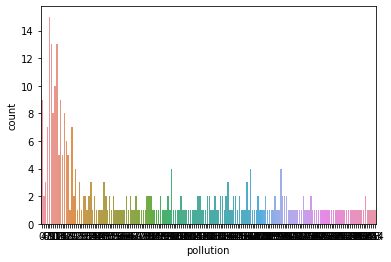

In [15]:
ax = sns.countplot(x="pollution", data=df)

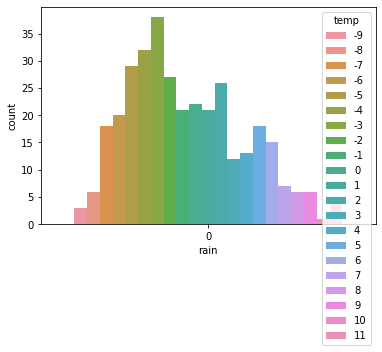

In [16]:
ax = sns.countplot(x = 'rain', data = df, hue = 'temp')

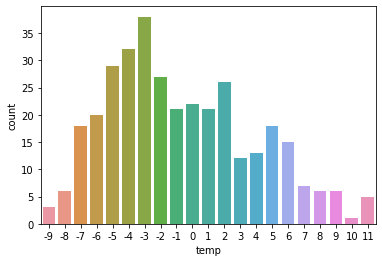

In [17]:
ax = sns.countplot(x="temp", data=df)

In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in df.columns:
    df[col] = enc.fit(df[col]).transform(df[col])

In [19]:
df.dtypes

dew          int64
temp         int64
press        int64
wnd_dir      int64
wnd_spd      int64
snow         int64
rain         int64
pollution    int64
dtype: object

In [20]:
df.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
0,9,13,16,2,12,0,0,92
1,8,14,16,2,33,0,0,55
2,9,13,16,2,38,0,0,47
3,9,10,17,3,1,0,0,56
4,11,9,17,0,4,0,0,67


In [21]:
df['press'] = df.pollution.pct_change(1)*100

In [22]:
df['wnd_spd'] = df.pollution.mul(df.pollution)

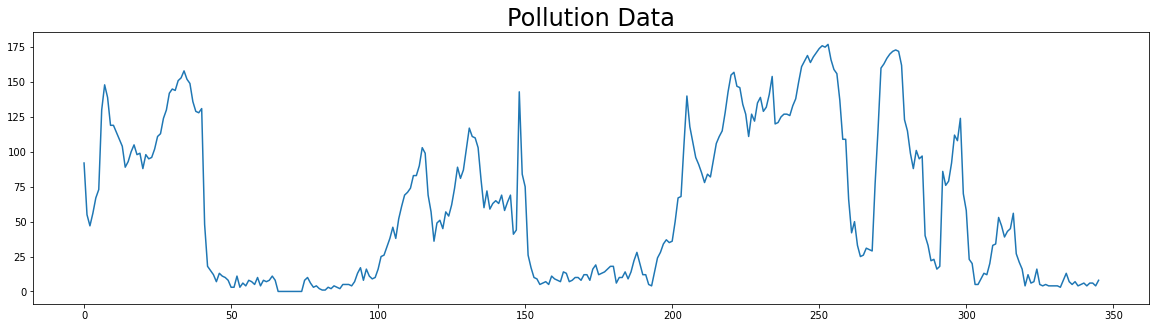

In [23]:
df.pollution.plot(figsize=(20,5))
plt.title("Pollution Data", size = 24)
plt.show()

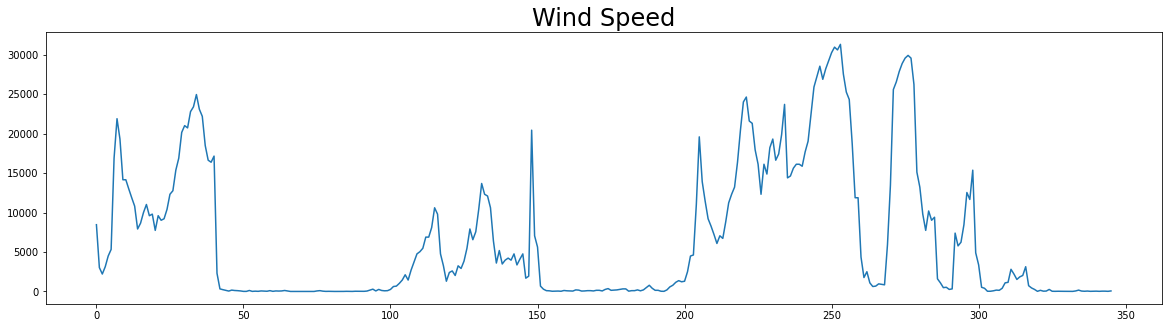

In [24]:
df.wnd_spd.plot(figsize=(20,5))
plt.title("Wind Speed", size = 24)
plt.show()

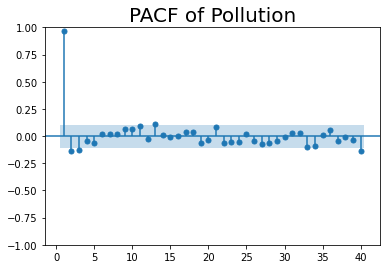

In [27]:
sgt.plot_pacf(df.pollution[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Pollution", size = 20)
plt.show()